In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def generate_synthetic_data():
    print("Generating synthetic energy data...")
    # Create date range for 6 months: Jan 2023 to June 2023
    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')
    
    # Create DataFrame
    df = pd.DataFrame(date_rng, columns=['timestamp'])
    
    # Simulate device power consumption (Watts)
    
    # 1. Fridge: Cyclic pattern (Compressor On/Off) + Base load
    # Randomly switching between low (idle) and high (cooling) states
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])
    
    # 2. AC: Higher in summer (April-June), lower in winter (Jan-March)
    month = df['timestamp'].dt.month
    # Higher probability of AC being ON in months 4, 5, 6
    ac_prob = np.where(month >= 4, 0.8, 0.1) 
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)
    
    # 3. Lights: Higher usage at night (18:00 - 06:00)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)
    
    # 4. Microwave: Random usage spikes
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.95, 0.05])
    
    # Total power consumption
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']
    
    # Introduce some random missing values to practice cleaning
    # Set 0.5% of total_power to NaN
    mask = np.random.choice([True, False], size=len(df), p=[0.005, 0.995])
    df.loc[mask, 'total_power'] = np.nan
    
    return df

# Generate and save
df_raw = generate_synthetic_data()
print("Data Generated. Shape:", df_raw.shape)
df_raw.to_csv()


Generating synthetic energy data...
Data Generated. Shape: (4321, 6)


C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_38744\2771334033.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


',timestamp,fridge,ac,lights,microwave,total_power\r\n0,2023-01-01 00:00:00,116,0,33,0,149.0\r\n1,2023-01-01 01:00:00,0,0,62,0,62.0\r\n2,2023-01-01 02:00:00,196,1425,62,1187,2870.0\r\n3,2023-01-01 03:00:00,0,0,33,0,33.0\r\n4,2023-01-01 04:00:00,0,2484,53,1004,3541.0\r\n5,2023-01-01 05:00:00,168,0,30,0,198.0\r\n6,2023-01-01 06:00:00,124,0,0,0,124.0\r\n7,2023-01-01 07:00:00,153,0,0,0,153.0\r\n8,2023-01-01 08:00:00,141,0,0,0,141.0\r\n9,2023-01-01 09:00:00,182,0,0,0,182.0\r\n10,2023-01-01 10:00:00,72,0,0,0,72.0\r\n11,2023-01-01 11:00:00,154,0,0,0,154.0\r\n12,2023-01-01 12:00:00,138,0,0,0,138.0\r\n13,2023-01-01 13:00:00,0,1808,0,0,1808.0\r\n14,2023-01-01 14:00:00,136,0,0,0,136.0\r\n15,2023-01-01 15:00:00,56,1433,0,0,1489.0\r\n16,2023-01-01 16:00:00,175,0,0,0,175.0\r\n17,2023-01-01 17:00:00,0,0,0,0,0.0\r\n18,2023-01-01 18:00:00,94,0,82,1115,1291.0\r\n19,2023-01-01 19:00:00,0,0,0,0,0.0\r\n20,2023-01-01 20:00:00,114,0,34,0,148.0\r\n21,2023-01-01 21:00:00,159,0,95,0,254.0\r\n22,2023-01-01 22:00

In [4]:
df_raw.to_csv("Synthetic-Data",index=True)
df_raw.iloc[:30]
df_raw


,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,116,0,33,0,149.0
1,2023-01-01 01:00:00,0,0,62,0,62.0
2,2023-01-01 02:00:00,196,1425,62,1187,2870.0
3,2023-01-01 03:00:00,0,0,33,0,33.0
4,2023-01-01 04:00:00,0,2484,53,1004,3541.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,0,0,91,0,91.0
4317,2023-06-29 21:00:00,150,0,58,0,208.0
4318,2023-06-29 22:00:00,0,2479,0,0,2479.0
4319,2023-06-29 23:00:00,173,2446,86,0,2705.0


In [5]:
missing = df_raw.isnull().sum()
print("Missing Values per column:\n", missing)

Missing Values per column:
 timestamp       0
fridge          0
ac              0
lights          0
microwave       0
total_power    20
dtype: int64


In [6]:
df_raw[df_raw['total_power'].isna()].index

Index([ 233,  744,  804,  956, 1375, 1696, 1940, 2056, 2064, 2286, 2489, 2634,
       2812, 2816, 3062, 3670, 3859, 3982, 4191, 4303],
      dtype='int64')

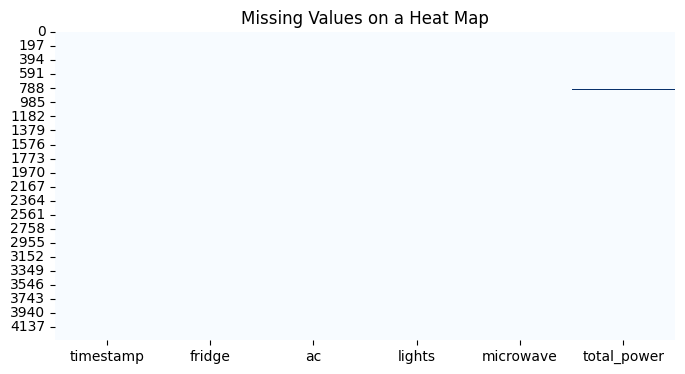

In [7]:
plt.figure(figsize=(8,4))
sns.heatmap(df_raw.isnull(),cbar=False,cmap='Blues')
plt.title("Missing Values on a Heat Map")
plt.show()

In [8]:
df_clean = df_raw.fillna(method='ffill')
df_clean.to_csv("Clean-Data",index = False)

C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_38744\332814519.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_raw.fillna(method='ffill')


In [9]:
df_clean[df_clean['total_power'].isna()].index

Index([], dtype='int64')

In [10]:
df_daily = df_clean.resample('D').mean()

df_weekly_sum = df_clean.resample('W').sum()

print("Daily resampled Shape", df_daily.shape)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [11]:
df = pd.read_csv('Clean-Data')
df

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,116,0,33,0,149.0
1,2023-01-01 01:00:00,0,0,62,0,62.0
2,2023-01-01 02:00:00,196,1425,62,1187,2870.0
3,2023-01-01 03:00:00,0,0,33,0,33.0
4,2023-01-01 04:00:00,0,2484,53,1004,3541.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,0,0,91,0,91.0
4317,2023-06-29 21:00:00,150,0,58,0,208.0
4318,2023-06-29 22:00:00,0,2479,0,0,2479.0
4319,2023-06-29 23:00:00,173,2446,86,0,2705.0


In [12]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df['timestamp']

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
4316   2023-06-29 20:00:00
4317   2023-06-29 21:00:00
4318   2023-06-29 22:00:00
4319   2023-06-29 23:00:00
4320   2023-06-30 00:00:00
Name: timestamp, Length: 4321, dtype: datetime64[ns]

In [13]:
df.set_index('timestamp',inplace=True)

In [14]:
df_daily = df.resample('D').mean()

df_weekly_sum = df.resample('W').sum()

# print("Daily resampled Shape", df_daily)
df_daily.to_csv('timed-data',index=True)
df_daily.head()



,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,97.166667,297.916667,26.208333,137.750000,559.041667
2023-01-02,99.958333,116.208333,31.000000,0.000000,247.166667
2023-01-03,82.000000,78.958333,35.625000,202.541667,399.125000
2023-01-04,78.125000,224.416667,29.458333,0.000000,332.000000
2023-01-05,74.833333,201.208333,30.875000,0.000000,306.916667


In [15]:
df_weekly_sum = df.resample('W').sum()

df_weekly_sum

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,2332,7150,629,3306,13417.0
2023-01-08,14768,28852,5256,7769,56645.0
2023-01-15,15002,39992,5419,7401,67808.0
2023-01-22,14367,27099,5474,9988,56928.0
2023-01-29,14326,27124,5772,7819,55041.0
2023-02-05,16927,30370,4771,12689,63716.0
2023-02-12,15479,29730,5740,9923,60103.0
2023-02-19,15240,24254,5299,8768,53561.0
2023-02-26,15136,26685,5586,7000,54407.0
